In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command

/content/gdrive/My Drive/Kaggle


In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip


--2020-12-15 12:13:33--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-12-15 12:13:34--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-12-15 12:13:34--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  train.csv.zip
  inflating: train.csv               

Archive:  glove.6B.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.

1 archive was successfully processed.
1 file had no zipfile directory.


## Mathmatical introduction


  **A neural network** is a basic algorithm uses a huge amount of data to learn computer how to understand the relations between this data. The basic idea in deep learning is to optimize a random set of arrays that represent weights.

These optimized weights carry inside information from all data. This information can help your computer to detect cars in the streets or translate from Arabic into English or to detect the toxic comments in Facebook depends only on the data that you used to feed the neural network.

  ** The gradien**t is the vector of the partial derivatives. It is well known that traversing a function in the direction of the gradient yields the steepest ascent or descent on the function. When you want to find the minimum of a multivariable function, moving in the negative direction of the gradient will get you the fastest (local) direction towards the minimum. In deep learning, the weights must be found such that it minimizes the penalty function, meaning it minimizes the gap or error between the predicted value of the model, and the actual value of the data. Finding the gradient of the penalty with respect to the weights will let your computer faster the candidate value of the weights that minimizes the error or penalty at that particular iteration.


  Neural Networks are AI models based on the neural structure of the brain and they have different types of layers that we will explain them soon. 

But they all have the same main steps. 

1)Starting with feeding input matrix to the neural network 

2) the matrix multiplied by the weight’s matrices in forward 
propagation 

3) comparing the result to the given result in the lose function.

4)then optimizing the weights by minimizing the loss function. 
During back propagation.

5)Repeat all process many times.


3.1 forward propagation
forward propagation differs a bit between the different types of the NN

3.1.1) Basic DNN

The basic NN used mainly in data analyses tasks and can be used also some neutral language processing a computer vison tasks in the end of the model but not as a major layer.

Every layer has 2 matrices to optimize w and b. forward propagation we multiply the input matrix by w the add b then feed the out to an activation function then feed the final output the next layer.

Z1=W1 X+b1         

 A1=G(Z1) ( feed the output to the next layer)

Z2= A1 X+b2

A2=G(Z2) (feed the output to the next layer)

And so on.

Were x is the input matrix, wn is the weights matrix of the layer n, G is the activation functions it is a special functions like tanh and sigmoid, An  is the output of layer number n .


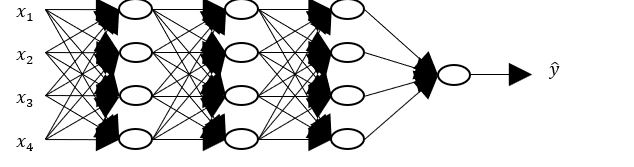

            .1.2) LSTM 

Let the input at time t in the LSTM cell be xt, the cell state from time t-1 and t be ct-1  and ct and the output for time t-1 and t be ht-1 and ht . The initial value of ct and ht at t = 0 will be zero.


Step 1 : Initialization of the weights .

Weights for different gates are : 

Input gate : wxi, wxg, bi, whj, wg , bg

Forget gate : wxf, bf, whf 

Output gate : wxo, bo, who



Step 2 : Passing through different gates .
Inputs: xt and ht-i , ct-1  are given to the LSTM cell 
Passing through input gate: 

Zg = wxg *x + whg * ht-1 + bg 

g = tanh(Zg)

Zj = wxi * x + whi * ht-1 + bi 

i =  sigmoid(Zi) 

Input_gate_out = g*i 

           
Passing through forget gate:  

Zf = wxf * x + whf *ht-1 + bf 

f = sigmoid(Zf) 

Forget_gate_out = f 
      

Passing through the output gate:  

Zo  = wxo*x +  who * ht-1 + bo 

o = sigmoid(zO) 

Out_gate_out = o


Step 3 : Calculating the output ht and current cell state ct.

Calculating the current cell state ct :

          ct = (ct-1 * forget_gate_out) + input_gate_out 


Calculating the output gate ht:

          ht=out_gate_out * tanh(ct)

implementation the forward computation step according to the LSTM 
net formula.
  We will follow this model for a single LSTM cell:


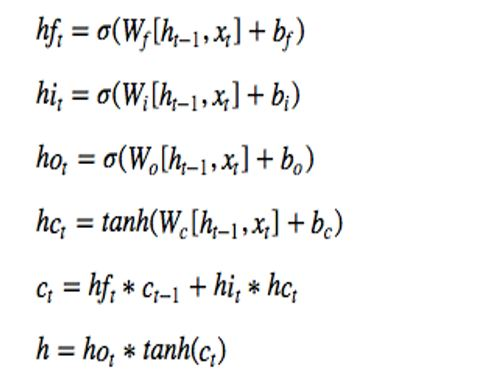

 3.2 loss function

 this function calculates the error in the result of the NN so minimizing this function will be our technic to optimize the weights of the NN.
There a lot of losing functions. in our project we used categorical cross entropy loss function:
L(a,y)=−m∑i=1m(y(i)log(a[L](i))+(1−y(i))log(1−a[L](i)))
Simpler formal:
L(a,Y)=-(Y log⁡(a)+(1-Y)log(1-a))

Where a is the protected value and Y is the real value.
3.3 backward propagation
  In backward propagation we try to optimize the parameters of the neural network to do that we use Gradient descent  
3.3.1Gradient descent for neural networks and Adam optimizer 
to minimize the lose function we use Gradient descent method.


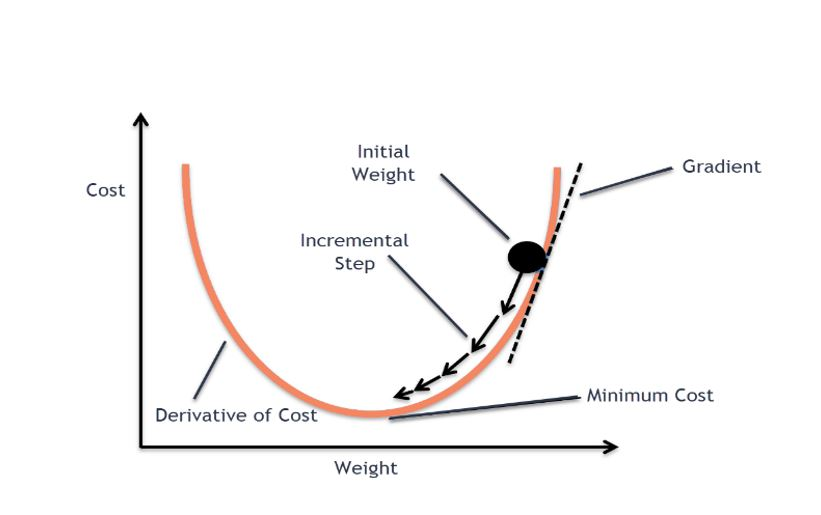

by subtraction the partial derivates of wights from the randomly initialized value.
We can obtain W that gives the smallest loss function. 
As we see in the following Equations


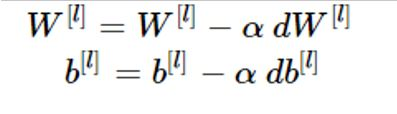

You Notic the α (the learning rate) this hyperparameter represent the speed of the stepping down in the loss function.
Adam is one of the most effective optimization algorithms for training neural networks.it Is does  as well as Gradient descent method based in the same Idea but some changes in hyperparameter that made it give us better results so we used it in our project. 
As we see:
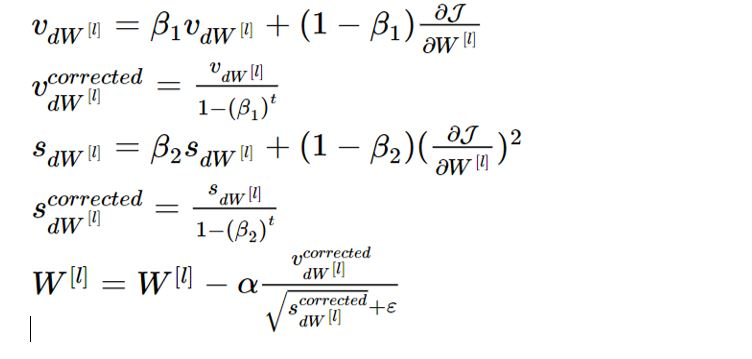



We use chain rule to calculate gradients from forward propagation equations as the following

da=∂l/∂a

dw=∂l/∂w=∂l/∂a×∂a/∂w


3.3.2) Basic DNN
Calculating the gradient using chain rule:

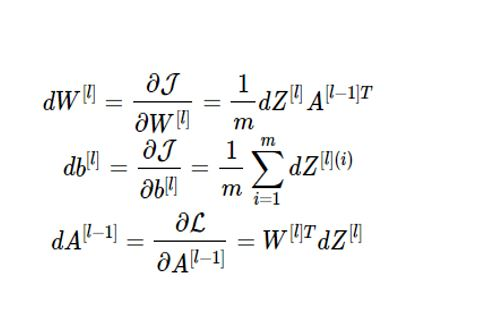

3.3.3) LSTM

Calculating the gradient through back propagation through time at time stamp t using chain rule.
      the gradients associated with the weights are:

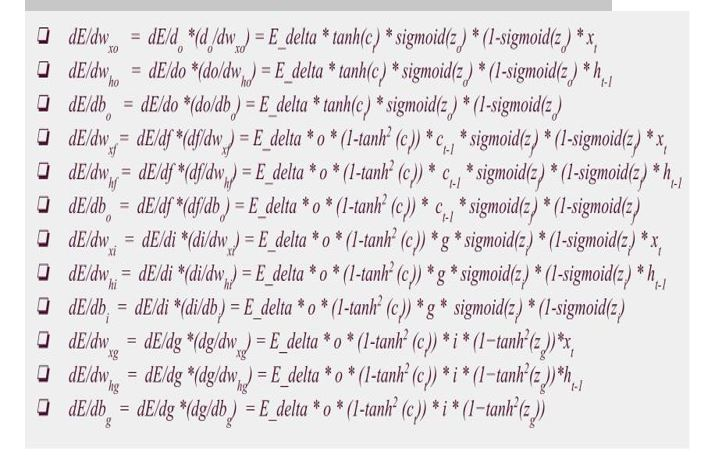

Bidirectional LSTM

we have implemented a framework based on a bidirectional LSTM with an output attention later that successfully performs multi label classification of various subtypes of toxic comments.
the addition of an attention layer to our bidirectional LSTM architecture significantly improve the performance of our application, so we found that bidirectional architecture were in all cases better than unibidirectional architecture just more than 1 layer in each direction (is bidirectional) led to over fitting ,so bidirectional LSTM as our main model for implementing attention. 


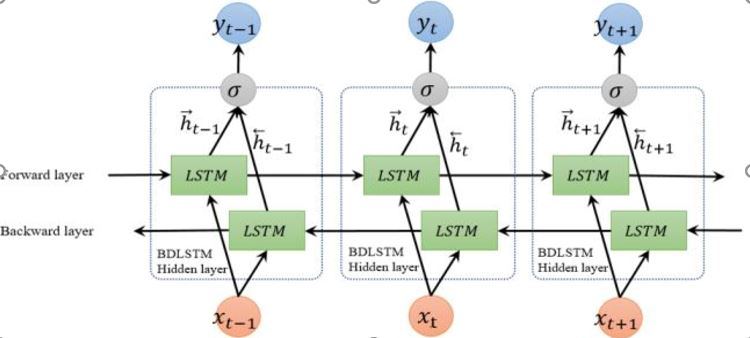

# start the code

A neural network is a basic algorithm uses a huge amount of data to learn computer how to understand the relations between this data. The basic idea in deep learning is to optimize a random set of arrays that represent weights. 
These optimized weights carry inside information from all data. This information can help your computer to detect cars in the streets or translate from Arabic into English or to detect the toxic comments in Facebook depends only on the data that you used to feed the neural network.

  **The gradient** is the vector of the *partial derivatives*. It is well known that traversing a function in the direction of the gradient yields the steepest ascent or descent on the function. When you want to find the minimum of a multivariable function, moving in the negative direction of the gradient will get you the fastest (local) direction towards the minimum. In deep learning, the weights must be found such that it minimizes the penalty function, meaning it minimizes the gap or error between the predicted value of the model, and the actual value of the data. Finding the gradient of the penalty with respect to the weights will let your computer faster the candidate value of the weights that minimizes the error or penalty at that particular iteration.


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D
from sklearn.model_selection import train_test_split
print(tf.__version__)

2.4.1


We read, our training set from csv file into a pandas datafram ‘train_df’ As shown .The dataset here is from wiki corpus dataset which was rated by human raters for toxicity. articles dating from 2004-2015.

In [6]:
# Load data
train_df=pd.read_csv('/content/gdrive/MyDrive/Kaggle/train.csv').fillna(' ')
train_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [8]:
# View few toxic comments
train_df.loc[train_df['toxic']==1]



,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0
...,...,...,...,...,...,...,...,...
159494,fef4cf7ba0012866,"""\n\n our previous conversation \n\nyou fuckin...",1,0,1,0,1,1
159514,ff39a2895fc3b40e,YOU ARE A MISCHIEVIOUS PUBIC HAIR,1,0,0,0,1,0
159541,ffa33d3122b599d6,Your absurd edits \n\nYour absurd edits on gre...,1,0,1,0,1,0
159546,ffb47123b2d82762,"""\n\nHey listen don't you ever!!!! Delete my e...",1,0,0,0,1,0


There is no need for some data columns now we put the data from “comment text” column in the matrix X and put the data from “toxic” column in the array Y.

In [9]:
x=train_df['comment_text'].values

In [10]:
y=train_df['toxic'].values

 we have 159571 comment in our training set.
144277 of them are not toxic and 15294 are toxic. We will use this data to train the 
Deep learning model.  BUT before that we need a way to enter text data to the model that accepts number only to do that, we need a away to represent text data into numbers. And that lead us to word embedding.



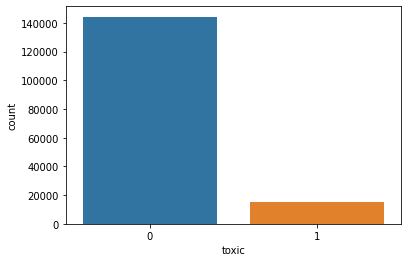

In [11]:
# Plot frequency of toxic comments

sns.countplot(x='toxic',data=train_df)

In [12]:
train_df['toxic'].value_counts()

0    144277
1     15294
Name: toxic, dtype: int64

#word embedding

It is a learning algorithm for obtaining vector representation for words so we can write sentences as numbers connected to each other
As we represent each word as a vector with fixed dimension each dimension is a feature of the word
ex: if we want to represent “ queen “ in 10 dimensions the first one will describe the human 

nature of this word the second one will describe its gender, but we cannot actually know what the numbers means because we obtained them by machine learning models, and we need at least 300 dimensions vector to represent one word.
Now if we wrote “king” we should get a very similar vector like queen because they are both have the same meaning but different in some feature.
So, we can now subtract words by each other like queen – girl + boy = king because we subtract vector that represent the gender and add another one 


In [13]:
max_features=20000
max_text_length=400


In [14]:
x_tokenizer=text.Tokenizer(max_features)
x_tokenizer.fit_on_texts(list(x))
x_tokenized=x_tokenizer.texts_to_sequences(x)
x_train_val=sequence.pad_sequences(x_tokenized,maxlen=max_text_length)


 Glove: Global Vectors for Word Representation
 _______________________________________________
 Glove is a technique to vectorize the words, combines some of the speed and simplicity of co-occurrence matrices with the power and task performance of direct prediction.  
Glove is a co-occurrence-based model. It starts by going through the entire corpus and constructing a co-occurrence matrix. It learns by looking at each pair of words in the corpus that might co-occur.
This method depends on using matrix the we call count matrix or co-occurrence matrix .
this matrix is obtained by the algorithm as it teach itself how to connect the words by each other by analyzing the input data so I t counts how many times 2 words came together in same sentence if the input data is 2 sentences “ I like deep learning .“ “I enjoy flying .” the count matrix will be 

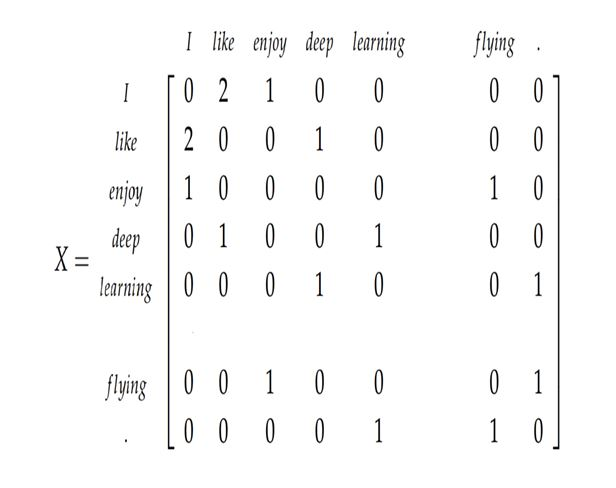



Xij = number of times the word j appears in the context of the word i
P (j | i) = the probability of the word j appears in the context of I = Xij / Xi
Xi = the summation of all the column values for a particular raw  
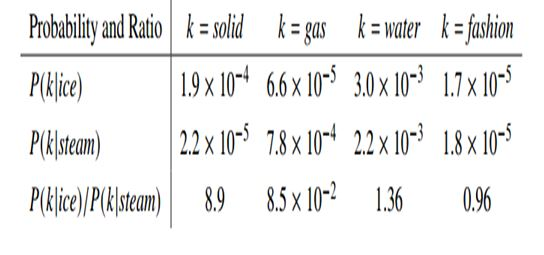

When the words is related we got high probability “solid and ice “and when they are not we got low probability “ gas and ice “.
When it comes to producing good word vectors, it uses an objective function to train word vectors from the co-occurrence matrix.
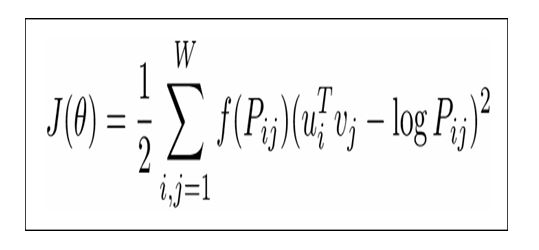

•	Where I, j is two words, J(Θ) is the objective function, Θ is all the word vectors you can change to minimize the objective function.

•	U, V are the two vectors which used for each word.

•	f(Pij) called a weighted function. 
             But this weighted function has some properties First, f(Pij) = 0 when Pij = 0. this means that when i and j do not co-occur, you don’t need to calculate (uiTvj - logPij)2, you can just stop at f(Pij).
              Secondly, f(Pij) helps counteract the problem of balancing the weight of very common or very uncommon words.

•	As w is the word size.


In [15]:
embedding_dim=100
embedding_index=dict()
f=open('/content/gdrive/MyDrive/Kaggle/glove.6B.100d.txt')
for line in f:
    values=line.split()
    word=values[0]
    coefs=np.asarray(values[1:],dtype='float32') 
    embedding_index[word]=coefs
    
f.close()
print(f'Found {len(embedding_index)} word vectors')

Found 400000 word vectors


In [16]:
embedding_matrix=np.zeros((max_features,embedding_dim))
for word,index in x_tokenizer.word_index.items():
    if index>max_features-1:
        break
    else:
        embedding_vector=embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[index]=embedding_vector

In [17]:
import tensorflow
from tensorflow.keras.layers import Input, Dense, LSTM, MaxPooling1D, Conv1D

## LSTM models’ structure

1- we made an embedding layer where each word turns into a vector, each vector is 100 dimensions vector using bigger than that does not give Noticeable benefits.

2- we used 3 BI-LSTM layers with 80 Neural

3- basic NN layer with 16 diminution and relu as an activation function

4- basic NN layer with 16 diminution and sigmoid as an activation function

5- basic NN layer with 1 diminution and relu as an activation function

we used 'Adam' optimizer to optimize the parameters.
Totally, the model has about 2.5 Million trainable parameters.


In [18]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

max_features = 20000  # Only consider the top 20k words
maxlen = 400  # Only consider the first 200 words of each movie review

In [22]:
x_train,x_val,y_train,y_val=train_test_split(x_train_val,y,test_size=0.2,random_state=1)

In [23]:
# Input for variable-length sequences of integers
inputs = keras.Input(shape=(None,), dtype="int32")
# Embed each integer in a 100-dimensional vector
x = layers.Embedding(max_features, 100,tf.keras.initializers.Constant(
                   embedding_matrix))(inputs)
# Add 2 bidirectional LSTMs
x = layers.Bidirectional(layers.LSTM(80, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(80, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(80))(x)
# Add a classifier
x = layers.Dense(16,activation='relu')(x)
x = layers.Dense(4,activation='relu')(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
modellstm100 = keras.Model(inputs, outputs)
modellstm100.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_1 (Embedding)      (None, None, 100)         2000000   
_________________________________________________________________
bidirectional_3 (Bidirection (None, None, 160)         115840    
_________________________________________________________________
bidirectional_4 (Bidirection (None, None, 160)         154240    
_________________________________________________________________
bidirectional_5 (Bidirection (None, 160)               154240    
_________________________________________________________________
dense_3 (Dense)              (None, 16)                2576      
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 68  

In [24]:
modellstm100.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


In [25]:
batch_size=128
epochs=3
modellstm100.fit(x_train,y_train,
         batch_size=batch_size,
         epochs=epochs,
         validation_data=(x_val,y_val))

Epoch 1/3
998/998 [==============================] - 215s 178ms/step - loss: 0.1746 - accuracy: 0.9368 - val_loss: 0.0996 - val_accuracy: 0.9629
Epoch 2/3
998/998 [==============================] - 177s 177ms/step - loss: 0.0909 - accuracy: 0.9656 - val_loss: 0.0964 - val_accuracy: 0.9643
Epoch 3/3
998/998 [==============================] - 176s 177ms/step - loss: 0.0760 - accuracy: 0.9701 - val_loss: 0.1058 - val_accuracy: 0.9642


try your textThat model took 781 seconds and we used 3 Epochs to run it with best accuracy = 0.9702, minimum loss = 0.0789 

let's try  our own wordes :)

In [26]:
import timeit
start_time = timeit.default_timer()
EX='you are a crazy'
T=np.array([EX])
x_test_tokenizedT=x_tokenizer.texts_to_sequences(T)
x_testingT=sequence.pad_sequences(x_test_tokenizedT,maxlen=max_text_length)
y_testingT=modellstm100.predict(x_testingT)
if y_testingT[0]>0.5 :
    print ('Toxic',y_testingT) 
else: print('Not Toxic',y_testingT)
elapsed = timeit.default_timer() - start_time
print('in time =',elapsed)

Toxic [[0.8952845]]
in time = 1.6571242380000513


the model discoverd that the comment "you are crazy" is a toxic comment

Finnaly, Thankes for reading